In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad

In [2]:
def integrand(a, om_m0, om_lam0):
    om_0 = om_m0 + om_lam0
    
    om_matter = om_m0 / a
    curvature = 1 - om_0
    om_lambda = om_lam0 * (a**2)
    
    
    return (om_matter + curvature + om_lambda) ** (-1/2)

In [3]:
def compute_a_and_t(om_m0, om_lam0, iterations):
    """
    Given a density parameter and something else, it returns two arrays:
    - array containg the values of a
    - array containg the values of t
    
    Besides the two arrays, it returns H0 as well.
    
    ## Example
    
    (a_s, t_s, H0) = compute_a_and_t(1, 0)
    
    """
    H = 71
    Mpc = 3.085677581e+19 # kms
    km = 1.0
    Gyr= 3.1536e16 # seconds
    H0 = (H * Gyr * km / Mpc)
    
    t0 = ((quad(integrand,0, 1, args=(om_m0, om_lam0)))[0]) / H0

    t_s = []
    a_s = []

    for i in range(1, iterations + 1):
        step = i / 10
    
        integral_result = quad(integrand, 0, step, args=(om_m0, om_lam0))[0]
        t = integral_result / H0 
    
        a_s.append(step)
        t_s.append(t)
        
    return (a_s, t_s, H0, t0)

In [25]:
final_results = []

for (om_mat, om_lam) in [(1, 0)]:
    (a_s, t_s, H0, t0) = compute_a_and_t(om_mat, om_lam, 1000)
    
    data = {"om_mat": om_mat, "om_lam": om_lam, "a": a_s, "t": t_s, "h": H0, "tzero": t0}
    
    final_results.append(data)

In [61]:
def EdS_verse(t, tzero):
    return np.sign(t) * (np.abs(t)** (2/3))/ (tzero ** (2/3))

In [66]:
def EdS_verse(t):
    return np.sign(t) * (np.abs(t)** (2/3))

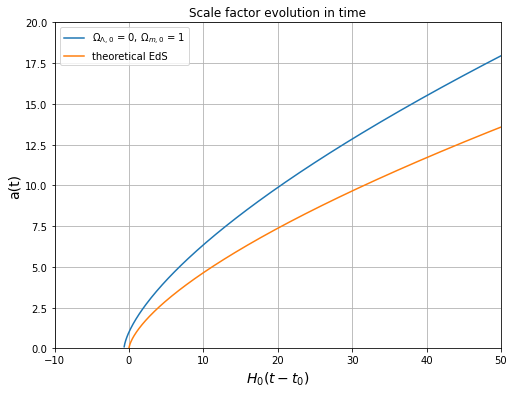

In [67]:
fig = plt.figure(figsize=(8, 6))
plt.title("Scale factor evolution in time")
plt.xlabel(r"$H_0 (t-t_0)$", fontsize = 14)
plt.ylabel("a(t)",fontsize = 14)
plt.grid(True)
plt.xlim(-10,50)
plt.ylim(0,20)

pyomlam = (r"$\Omega_{\Lambda,0}$")
pyommat = (r"$\Omega_{m, 0}$")


for result in final_results:
    plt.plot(result["h"] * (np.array(result["t"]) - result["tzero"]), np.array(result["a"]),
            label = "{pyomlam} = {om_lam}, {pyommat} = {om_mat}".format(
                pyomlam = pyomlam, om_lam = result["om_lam"], pyommat = pyommat, om_mat = result["om_mat"]))
    
    plt.plot(np.linspace(-10, 100, 1000), EdS_verse(np.linspace(-10, 100, 1000)), label = "theoretical EdS")
    plt.legend()
    

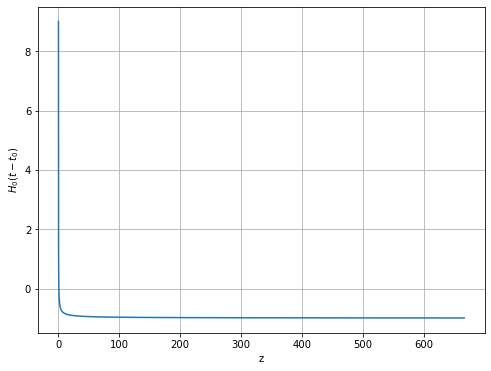

In [24]:
fig = plt.figure(figsize = (8,6))
plt.xlabel("z")
plt.ylabel(r"$H_0(t-t_0)$")
for result in final_results:
    plt.plot((np.array(result["a"])**(-1) - 1), result["h"]* np.array(result["t"]))
    plt.grid(True)